In [6]:
#kütüphaneleri import ediyoruz
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns #gorsellestirme kutuphanesidir


In [7]:
# video hakkindaki bilgileri bu makalelerden ediniyoruz
"""
https://motchallenge.net/vis/MOT17-13-SDP/det/
https://arxiv.org/pdf/1603.00831.pdf
"""


'\nhttps://motchallenge.net/vis/MOT17-13-SDP/det/\nhttps://arxiv.org/pdf/1603.00831.pdf\n'

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


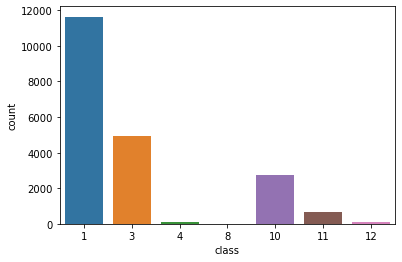

In [8]:
#makalelerde gt icerisindeki bilgilerin ne olduğunu öğreniyoruz 
#frame_number : frame bilgisi
#identity_number: objeyi tanımladigimiz numara
# left, top, width, height : olusturulan karenin konum bilgileri
#score: ne kadar goruldugu
#class: yaya mı, araç mı ne oldugunu burdan anliyoruz
#visibility: görunurluk (mesela nesneyi tamamen gormusse 1 atiyoruz %80 ini goruyursak 0.8 atıyoryuz)
col_list = ["frame_number","identity_number","left","top","width","height","score","class","visibility"]

#gt.txt içerisindeki her bir famreye denk gelen bilgileri alıyoruz
data = pd.read_csv("gt.txt", names = col_list)

#veri içerisinde kac farksli sinif old goserir
plt.figure()
sns.countplot(data["class"])

#arabaysa class 3'tür
car = data[data["class"] == 3]

#videomuzu iceri aktariyoruz
video_path = "MOT17-13-SDP.mp4"

#videoyu okuyoruz
cap = cv2.VideoCapture(video_path)

#29 numaralı araci takip etmek istiyorum bu nedenle id 29 atiyorum
id1 = 29
numberOfImage = np.max(data["frame_number"])
fps = 25

#arabamın bulundugu kutulari depolayacagim
bound_box_list = []

#son frameye kadar bir for aciyoruz daha sonra bu for icerisinde id si 29 olab arabayı kutu icerisine alacagiz
for i in range(numberOfImage-1):
    
    ret, frame = cap.read()
    
    if ret:
        #frame ozelliklerini yeniden tanimliyoruz
        frame = cv2.resize(frame, dsize=(960,540))
        
        #id filtrelemesi yapıyoruz
        filter_id1 = np.logical_and(car["frame_number"] == i+1, car["identity_number"]==id1)
        
        
        
        if len(car[filter_id1]) != 0:
            
            #kordinatları
            x = int(car[filter_id1].left.values[0]/2)
            y = int(car[filter_id1].top.values[0]/2)
            w = int(car[filter_id1].width.values[0]/2)
            h = int(car[filter_id1].height.values[0]/2)
            
            #arabayo kare içserisine aliyoruz
            cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
            #ortasına bir nokta koyuyoruz
            cv2.circle(frame, (int(x+w/2),int(y+h/2)), 2, (0,0,255),-1)
            
            # frame, x, y, genis, yuksek, center_x, center_y
            bound_box_list.append([i, x,y,w,h,int(x+w/2),int(y+h/2)])
            
        #hangi framede oldugumuzu yaziyoruz       kordinat , font, renk ve kalinlik
        cv2.putText(frame, "Frame num:"+str(i+1), (10,30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,0,255),2)
        
        #goster
        cv2.imshow("frame", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"): break #q basınca fordan çık
    else: break

cap.release() #video dosyası kapatılır
cv2.destroyAllWindows() #açılan tüm pencereler kapatılır.        
  

df = pd.DataFrame(bound_box_list, columns = ["frame_no", "x", "y", "w", "h", "center_x", "center_y"])
      
df.to_csv("gt_new.txt",index=False)